#TASK 1 - HANDLING THE DATA 👉 📫
##Using job info related db from kaggle
###< https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data >

##general approach
1) find sub tasks for each of the for tasks -> tasks list to be performed obtained

2) do tasks



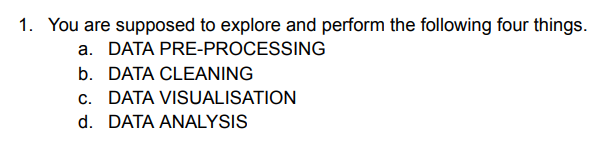

#Step 0 -> fetching data{set} :)





In [129]:
#trying to load the db and print it
#i can try to pull from kaggle technically, but whateve,
#im gonna upload the db to my drive and access it via my google drive,
#if u have downloaded the ds, then pass respective address to the loader fn

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data/jobs_in_data.csv')

df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


#Step 1 -> data preprocessing



##DATA PRE-PROCESSING

>drop unwanted columns

>Check for missing values using isnull() or info().

>Handle missing values using methods like fillna() or dropna().



In [130]:
#droping unwanted colums
#lets first see what are all the columns present

print(df.columns)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [131]:
#lets just drop the company size as it dosent have detailed categories
df.drop('company_size', axis=1, inplace=True)

print(df.columns)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location'],
      dtype='object')


In [132]:
#dropping unwanted rows
#lets see how many rows r there before cleaning

print("Number of rows befor cleanin:", df.shape[0])

Number of rows befor cleanin: 9355


In [133]:
#seeing if any missing data
missing_data = df.isnull()

# Count the number of missing values in each column
missing_counts = missing_data.sum()

# Display the missing counts
print("Missing Data Counts:")
print(missing_counts)

Missing Data Counts:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
dtype: int64


In [134]:
#dropping null values
df = df.dropna()
print("Number of rows after droppin null values:", df.shape[0])

Number of rows after droppin null values: 9355


In [135]:
# Check if there are zero values in the DataFrame
are_zeros = (df == 0).any()

# Display the columns with zero values
print("Columns with zero values:")
print(are_zeros[are_zeros].index.tolist())

Columns with zero values:
[]


In [136]:
# Check if there are zero values along rows
are_zeros_rows = (df != 0).any(axis=1)

# Display the rows with zero values
print("Rows with zero values:")
print(all(are_zeros_rows))

Rows with zero values:
True


#Step 2 -> data cleaning 🧹

##DATA CLEANING

>Identify and remove duplicates using duplicated() and drop_duplicates().

>Address outliers using statistical methods (e.g., Z-score, IQR).


>Standardize or normalize numerical data if necessary.

In [137]:
#removing duplicates
#so we drop a row if exactly the same info is contained in another row across all columns
#(would it be significant to analyses if 2 people had the same job data, and we only kept one?
#It wont matter in a classification stand point, will it in a statistical one,
#could a extra field like employee id be used to distingoush bet actuall duplicates and 2 people with same data?)

print("Number of rows before dropping duplicates:", df.shape[0])
df = df.drop_duplicates()
print("Number of rows after droppin duplicates:", df.shape[0])

Number of rows before dropping duplicates: 9355
Number of rows after droppin duplicates: 5308


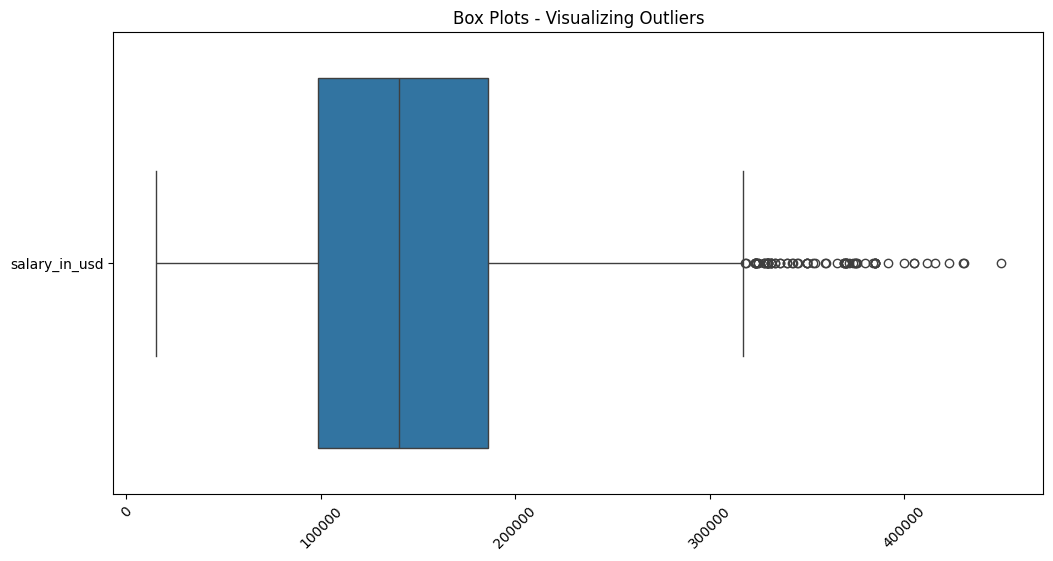

In [138]:
#Outliers
#were first gonna try to visualize outliers before removing them,
#first lets try IQR

#visualizing data, lets choose salary_in_usd for the forthcoming visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier visualization
#numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

numerical_columns = ['salary_in_usd']

# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title("Box Plots - Visualizing Outliers")
plt.xticks(rotation=45)
plt.show()


*Left End of Box: Q1 (First Quartile)*

*Right End of Box: Q3 (Third Quartile)*

*Line Inside Box: Median (Q2)*

*Left Whisker: Minimum within the range (not including outliers) (lik 1.5 IQR)*

*Right Whisker: Maximum within the range (not including outliers) (lik 1.5 IQR)*

*Dots Outside Whiskers: Outliers*

In [139]:
#okeyy now remove the outliers (;
#IQR generally sets a range by analysing the dist of data by percentiles, data very far from the 25 to 75 % values, are considered outliers


# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Remove outliers for each numerical column
for column in numerical_columns:
    df_IQR = remove_outliers_iqr(df, column)

print("Number of rows before droppin outliers:", df.shape[0])
print("Number of rows after droppin outliers(IQR):", df_IQR.shape[0])

Number of rows before droppin outliers: 5308
Number of rows after droppin outliers(IQR): 5231


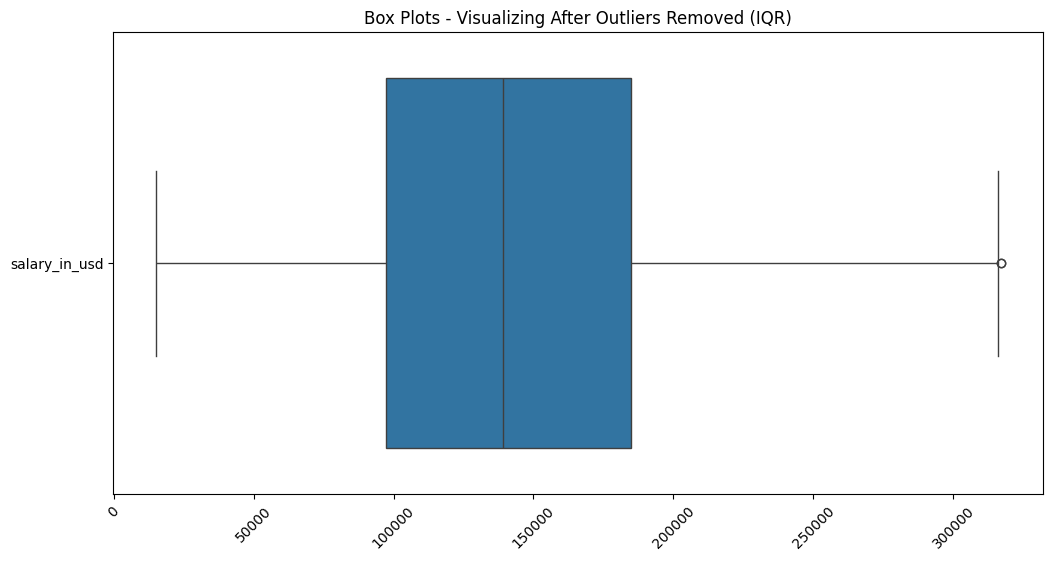

In [140]:
#after removing using IQR
# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_IQR[numerical_columns], orient='h')
plt.title("Box Plots - Visualizing After Outliers Removed (IQR)")
plt.xticks(rotation=45)
plt.show()


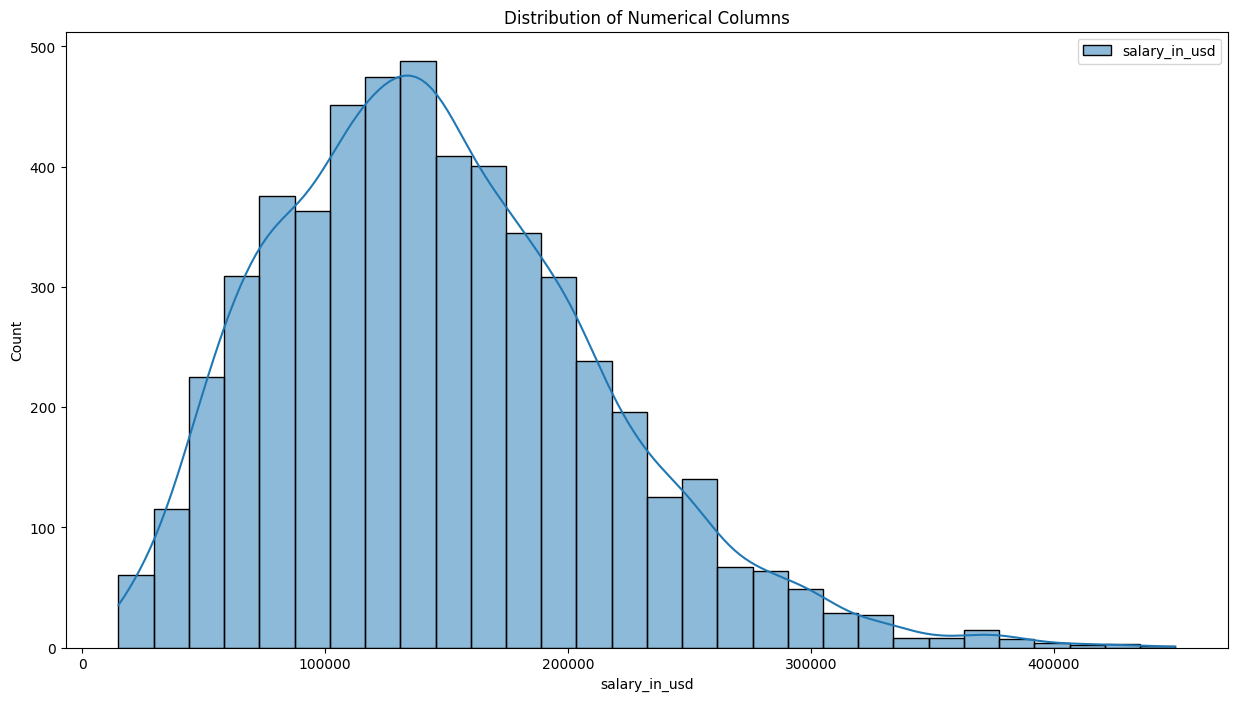

In [141]:
#Trying for standard deviation(standard deviation is lik, how much the values are deviated from the standard,
#it generally describes the spread of data, the data with a higher order of deviation, is much far from the expected,
#entries with high devitaions can be procedurally ignored, as they are probabilisticly unlikely)

# Plot the distribution of numerical columns
plt.figure(figsize=(15, 8))
for column in numerical_columns:
    sns.histplot(df[column], kde=True, label=column, bins=30)

plt.title("Distribution of Numerical Columns")
plt.legend()
plt.show()

In [142]:
# Function to remove outliers based on standard deviation
def remove_outliers_std(df, column, z_score_threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[abs(z_scores) < z_score_threshold]

# Remove outliers for each numerical column using standard deviation
for column in numerical_columns:
    df_STD = remove_outliers_std(df, column)


print("Number of rows before droppin outliers:", df.shape[0])
print("Number of rows after droppin outliers(IQR):", df_STD.shape[0])

Number of rows before droppin outliers: 5308
Number of rows after droppin outliers(IQR): 5268


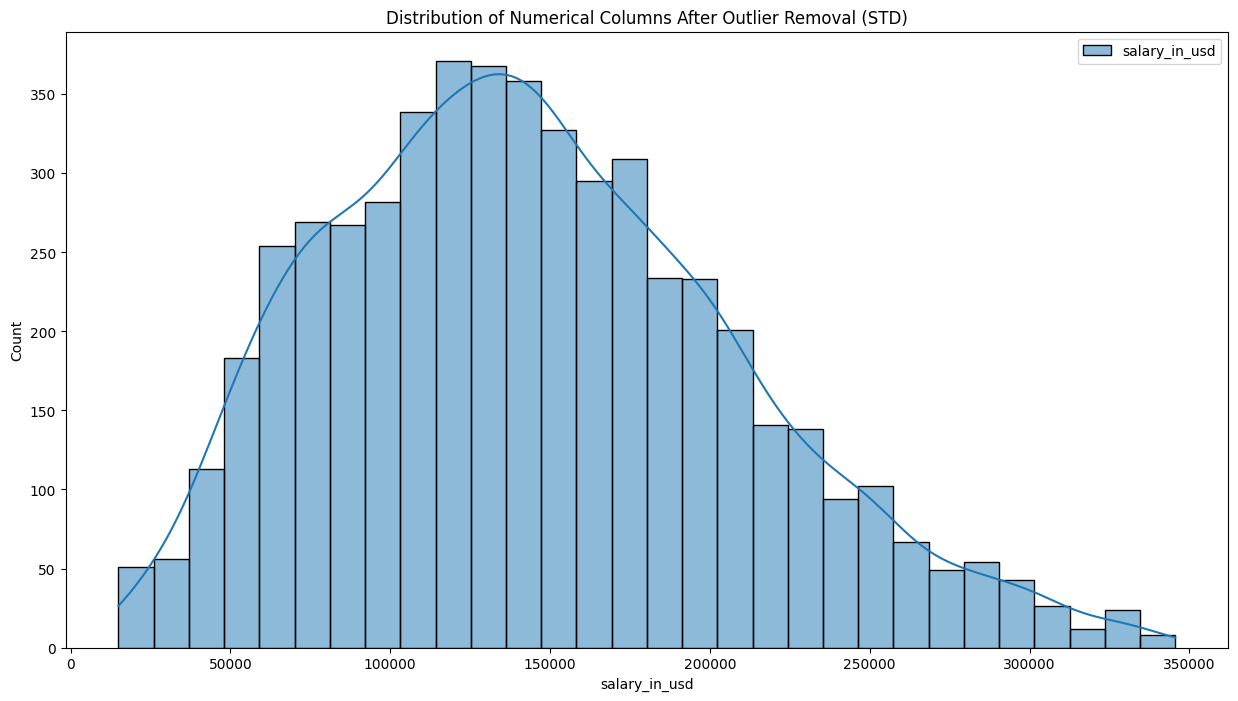

In [143]:
#dist after removing outliers with std

# Plot the distribution of numerical columns
plt.figure(figsize=(15, 8))
for column in numerical_columns:
    sns.histplot(df_STD[column], kde=True, label=column, bins=30)

plt.title("Distribution of Numerical Columns After Outlier Removal (STD)")
plt.legend()
plt.show()

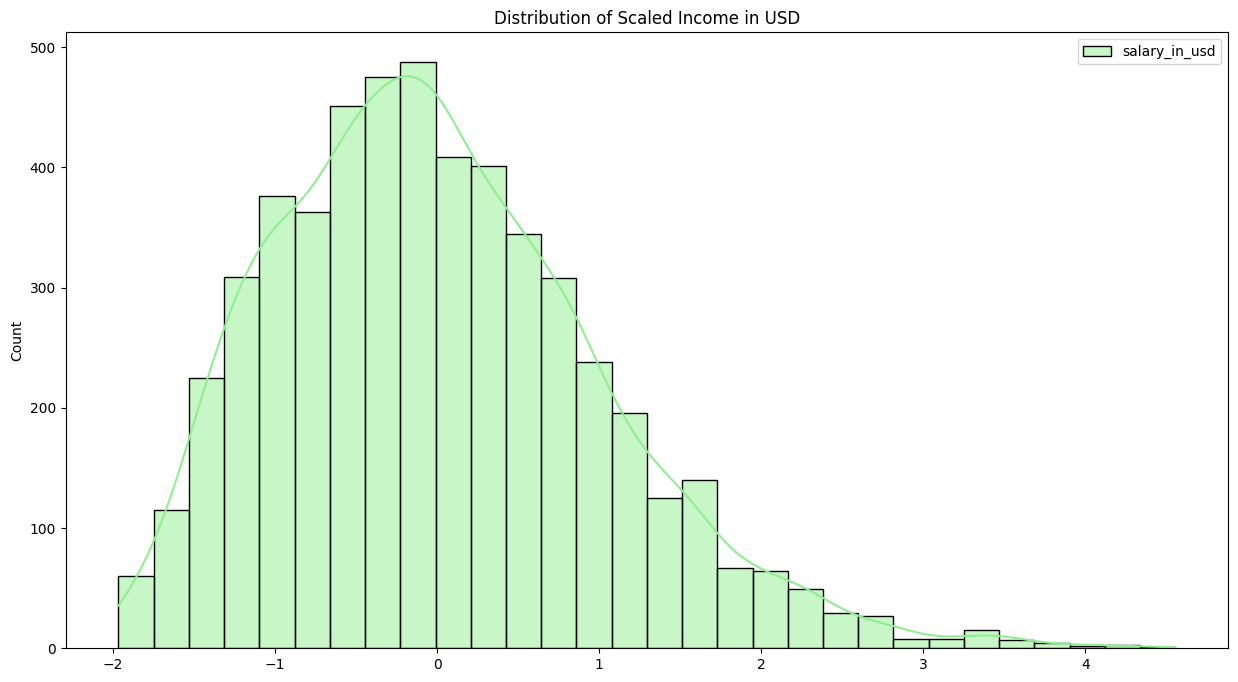

In [144]:
#just trying to scale values
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the numerical columns
transformed_col = scaler.fit_transform(df[numerical_columns])


#plottin
plt.figure(figsize=(15, 8))
sns.histplot(transformed_col, kde=True, label=column, bins=30, palette = ['lightgreen'])

plt.title("Distribution of Scaled Income in USD")
plt.legend()
plt.show()

#Step 3 -> data visualization 👀

##DATA VISUALIZATION
>Choose appropriate visualization types (e.g., bar plots, histograms, scatter plots).

>Customize visualizations with titles, labels, and color schemes.

>Explore relationships between variables using pair plots or correlation matrices.

>Identify and visualize trends or patterns in the data.

In [145]:
"""
multi line comments ^-^
sop, we hav to get graphs, we can try many things,
first lets see what are the columns

lets set expected relations and check them with graph

work year vs avg_salary -> inc trend expected(bar)
salary in usd and salary with scatter plot on salary_currency(scatter)
"""

print(df.columns)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location'],
      dtype='object')


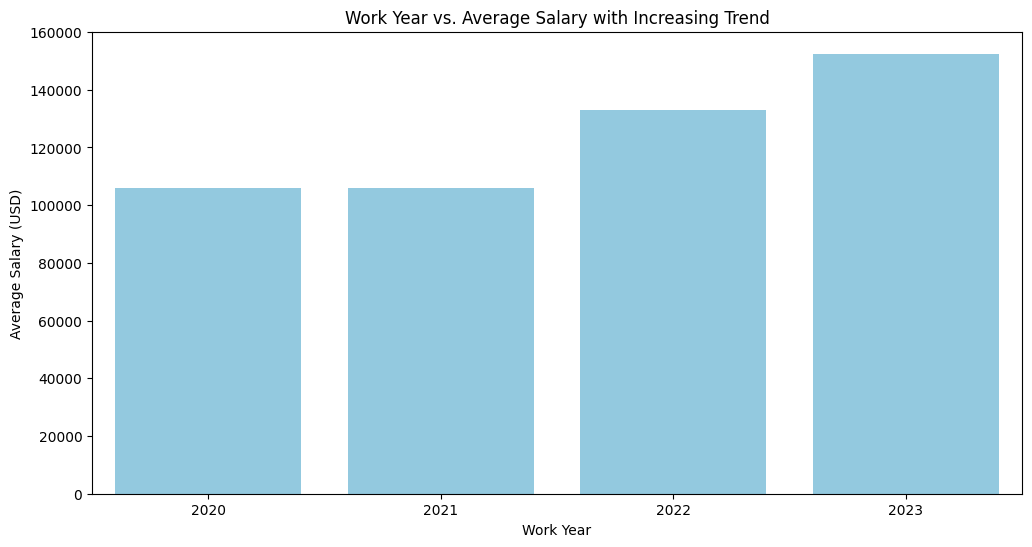

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average salary for each work year
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create a bar plot with an increasing trend
plt.figure(figsize=(12, 6))
sns.barplot(x='work_year', y='salary_in_usd', data=avg_salary_by_year, color='skyblue')
plt.title("Work Year vs. Average Salary with Increasing Trend")
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.show()

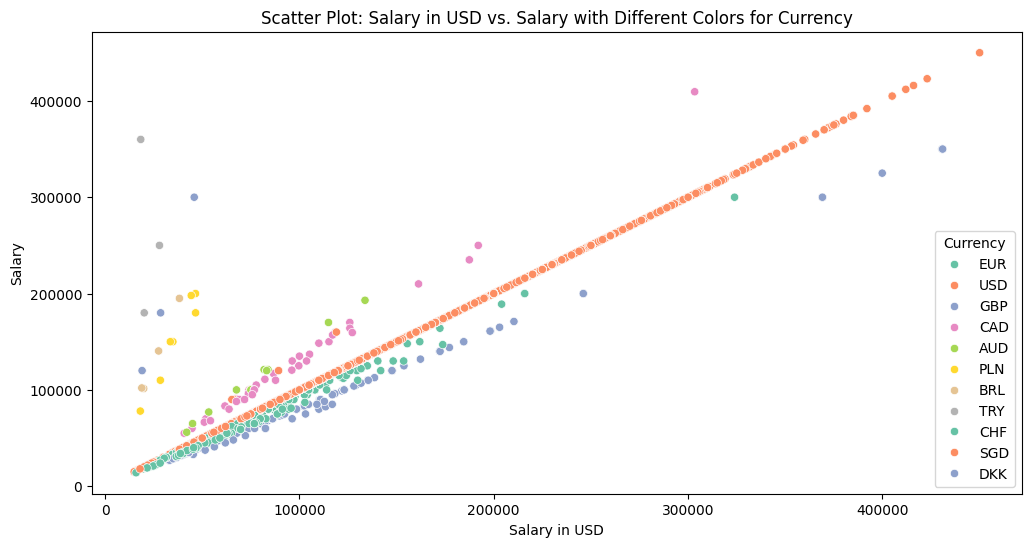

'\nwe can see the conversion ratio of currencies, reflected on the plot, \nthe usd is along  x=y line as salary and salary in usd is same\n\nthe slope of the lines generated by diffent currencies , depict the difference in conversion ratio\n'

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with different colors for currency using a different color palette
plt.figure(figsize=(12, 6))
sns.scatterplot(x='salary_in_usd', y='salary', hue='salary_currency', data=df, palette='Set2')
plt.title("Scatter Plot: Salary in USD vs. Salary with Different Colors for Currency")
plt.xlabel("Salary in USD")
plt.ylabel("Salary")
plt.legend(title='Currency')
plt.show()

"""
we can see the conversion ratio of currencies, reflected on the plot,
the usd is along  x=y line as salary and salary in usd is same

the slope of the lines generated by diffent currencies , depict the difference in conversion ratio
"""

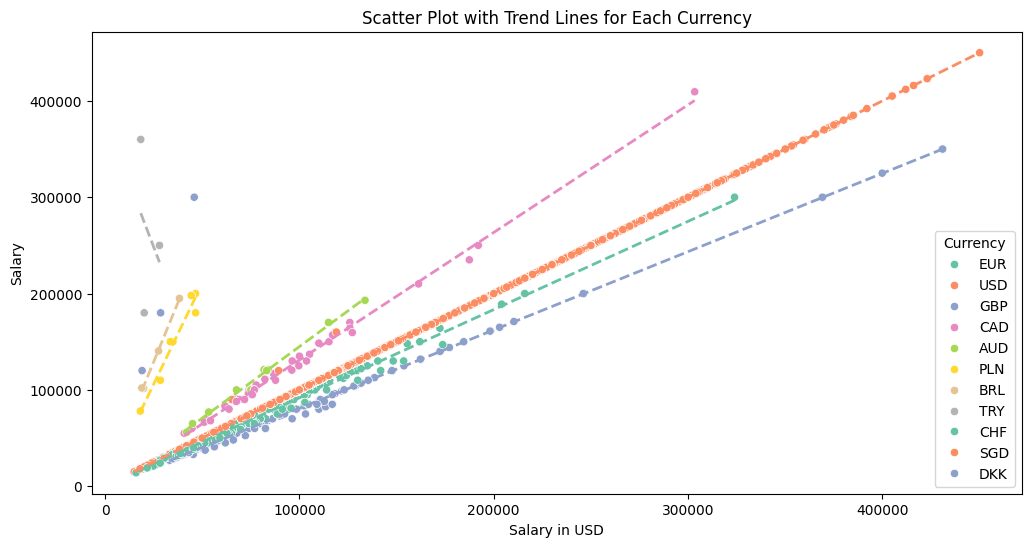

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


# Create a scatter plot with different colors for currency using a different color palette
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='salary_in_usd', y='salary', hue='salary_currency', data=df, palette='Set2')

# Dictionary to store slopes for each currency
slopes_dict = {}

# Fit linear regression lines for each currency group
for currency, color in zip(df['salary_currency'].unique(), sns.color_palette('Set2')):
    subset = df[df['salary_currency'] == currency]
    X = subset['salary_in_usd'].values.reshape(-1, 1)
    y = subset['salary'].values
    model = LinearRegression().fit(X, y)

    # Store the slope in the dictionary
    slopes_dict[currency] = model.coef_[0]

    # Generate x values for the line
    x_line = np.linspace(X.min(), X.max(), 100)
    # Predict y values using the model
    y_line = model.predict(x_line.reshape(-1, 1))

    # Plot the regression line
    plt.plot(x_line, y_line, color=color, linestyle='--', linewidth=2)

plt.title("Scatter Plot with Trend Lines for Each Currency")
plt.xlabel("Salary in USD")
plt.ylabel("Salary")
plt.legend(title='Currency')

plt.show()


In [149]:
#lets try finding the slope for each currency


# Print the slopes
for currency, slope in slopes_dict.items():
    print(f"Slope for {currency}: {slope}")

Slope for EUR: 0.9162806665112684
Slope for USD: 0.9999999999999998
Slope for GBP: 0.8130574472105717
Slope for CAD: 1.3248886271131592
Slope for AUD: 1.4859430189902207
Slope for PLN: 4.191315615421067
Slope for BRL: 4.920364934083541
Slope for TRY: -5.285523953183547


In [150]:
#lets remove negative slopes due to limited data
slopes_dict = {currency: slope for currency, slope in slopes_dict.items() if slope > 0}
for currency, slope in slopes_dict.items():
    print(f"Slope for {currency}: {slope}")

Slope for EUR: 0.9162806665112684
Slope for USD: 0.9999999999999998
Slope for GBP: 0.8130574472105717
Slope for CAD: 1.3248886271131592
Slope for AUD: 1.4859430189902207
Slope for PLN: 4.191315615421067
Slope for BRL: 4.920364934083541


Now lets see the maths,

$$
\text{slope} = \frac{\text{salary}}{\text{salary in USD}} = \frac{ \, \text{XYZ}}{ \, \text{USD}}
$$
so,

$$
n \, \text{USD} = \frac{1 \text{XYZ}}{\text{slope}} \implies 1 \, \text{XYZ} = \frac{1 }{\text{slope}} \, \text{USD}
$$




In [151]:
#lets hypotehically derive the native currencies to USD at the time of data createion
for currency, slope in slopes_dict.items():
    print(f"1 {currency} = {(1 / slope):.4f} USD")

# :) output seems to match with real world conversion rate

1 EUR = 1.0914 USD
1 USD = 1.0000 USD
1 GBP = 1.2299 USD
1 CAD = 0.7548 USD
1 AUD = 0.6730 USD
1 PLN = 0.2386 USD
1 BRL = 0.2032 USD


In [152]:
#now lets try to plot country of residence with the salary in usd on world map
#lets see all the countries

print(df['employee_residence'].unique())

['Germany' 'United States' 'United Kingdom' 'Canada' 'Spain' 'Ireland'
 'South Africa' 'Poland' 'France' 'Czech Republic' 'Netherlands'
 'Pakistan' 'Ukraine' 'Lithuania' 'Portugal' 'Australia' 'Uganda'
 'Colombia' 'Italy' 'Slovenia' 'Romania' 'Greece' 'India' 'Latvia'
 'Mauritius' 'Armenia' 'Croatia' 'Thailand' 'South Korea' 'Estonia'
 'Turkey' 'Philippines' 'Brazil' 'Qatar' 'Russia' 'Kenya' 'Tunisia'
 'Ghana' 'Belgium' 'Switzerland' 'Andorra' 'Ecuador' 'Peru' 'Mexico'
 'Moldova' 'Nigeria' 'Saudi Arabia' 'Argentina' 'Egypt' 'Uzbekistan'
 'Georgia' 'Central African Republic' 'Finland' 'Austria' 'Singapore'
 'Sweden' 'Kuwait' 'Cyprus' 'Bosnia and Herzegovina' 'Iran'
 'American Samoa' 'China' 'Costa Rica' 'Chile' 'Puerto Rico' 'Denmark'
 'Bolivia' 'Dominican Republic' 'Indonesia' 'United Arab Emirates'
 'Malaysia' 'Japan' 'Honduras' 'Algeria' 'Vietnam' 'Iraq' 'Bulgaria'
 'Jersey' 'Serbia' 'New Zealand' 'Hong Kong' 'Luxembourg' 'Malta']


In [153]:
import plotly.express as px
import pandas as pd


# Calculate average salary for each country by residence
average_salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Create a choropleth map plot using the average salary
fig = px.choropleth(average_salary_by_country,
                    locations='employee_residence',  # Column containing country names
                    locationmode='country names',    # Set location mode
                    color='salary_in_usd',           # Color scale based on average salary_in_usd
                    hover_name='employee_residence',  # Tooltip information
                    color_continuous_scale='Viridis', # Color scale
                    projection='natural earth',
                    title='Average Salary in USD by Country')

# Show the plot
fig.show()

#interactive plot -> drag / zoom and hover over country for the metrics


In [154]:


# Calculate average salary for each country by company country
average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Create a choropleth map plot using the average salary
fig = px.choropleth(average_salary_by_country,
                    locations='company_location',  # Column containing country names
                    locationmode='country names',    # Set location mode
                    color='salary_in_usd',           # Color scale based on average salary_in_usd
                    hover_name='company_location',  # Tooltip information
                    projection='natural earth',
                    color_continuous_scale='Viridis', # Color scale
                    title='Average Salary in USD by Country')

# Show the plot
fig.show()

#Step 4 -> data analysis 🔍

##DATA ANALYSIS
>Select attributes for analysis based on project goals.

>Calculate central tendencies (mean, median, mode) for relevant attributes.

>Explore statistical measures of dispersion (variance, standard deviation).

>Perform hypothesis testing if applicable.

In [155]:
# Calculate mean, median, mode, and standard deviation
mean_salary = df['salary_in_usd'].mean()
median_salary = df['salary_in_usd'].median()
mode_salary = df['salary_in_usd'].mode().iloc[0]  # Mode returns a Series, so we extract the first value
std_salary = df['salary_in_usd'].std()

# Print the results
print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")
print(f"Mode Salary: {mode_salary:.2f}")
print(f"Standard Deviation: {std_salary:.2f}")


Mean Salary: 146211.42
Median Salary: 140000.00
Mode Salary: 100000.00
Standard Deviation: 66703.75


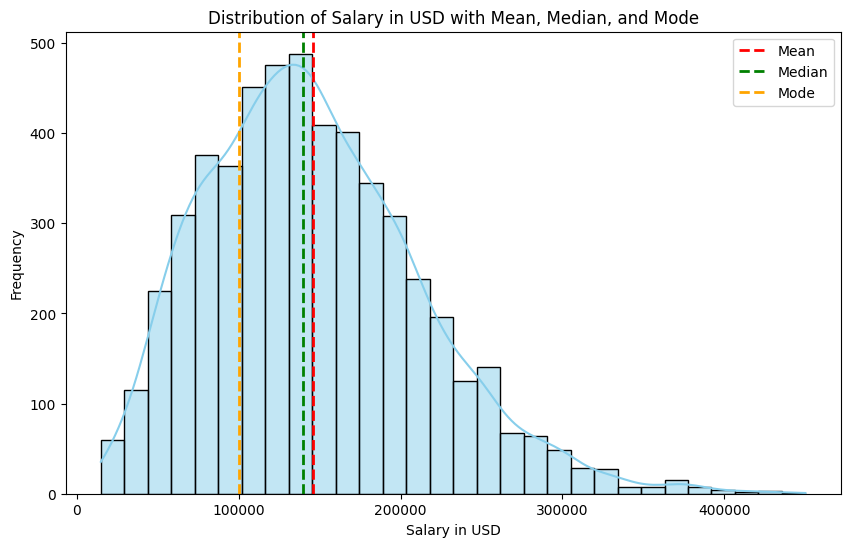

In [156]:
#let us try plotting the measures on a graph
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='skyblue')

# Plot vertical lines for mean, median, and mode
plt.axvline(df['salary_in_usd'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['salary_in_usd'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['salary_in_usd'].mode().iloc[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

# Add labels and title
plt.title('Distribution of Salary in USD with Mean, Median, and Mode')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


In [157]:
"""
Inference
the mode is 100k since people mostly round the value to the nearest whole amount,
so if we are just speaking about salaries, saying 100k would be acceptable

For the mean value, it is the avreage of all elements, quite significant in getting
a salary status of a average worker

Meadian being the middle value, it is the salary which divides workers based on thier salary
exactly into 2 halves
"""

'\nInference\nthe mode is 100k since people mostly round the value to the nearest whole amount,\nso if we are just speaking about salaries, saying 100k would be acceptable\n\nFor the mean value, it is the avreage of all elements, quite significant in getting \na salary status of a average worker\n\nMeadian being the middle value, it is the salary which divides workers based on thier salary\nexactly into 2 halves\n'

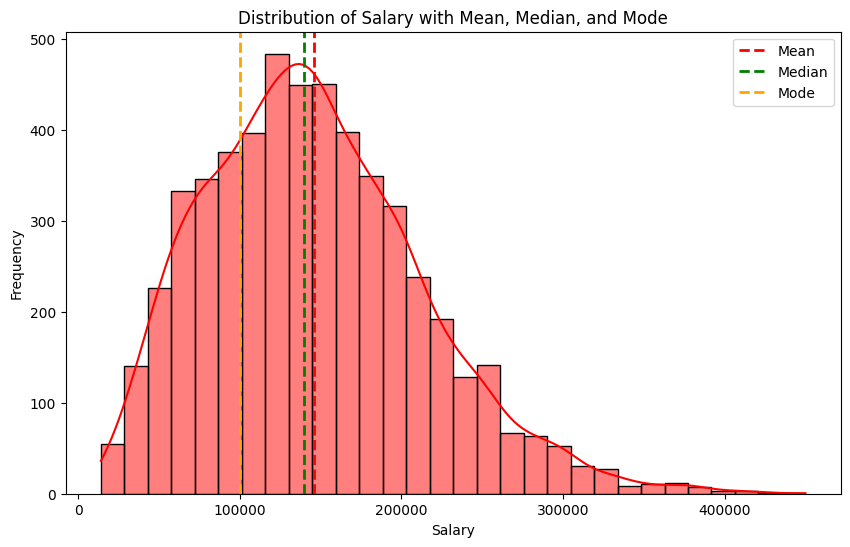

In [158]:
#lets just try plotting the normal salary, since differnt currencies were used, we would expect to see clusters

#let us try plotting the measures on a graph
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=30, kde=True, color='red')

# Plot vertical lines for mean, median, and mode
plt.axvline(df['salary'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['salary'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['salary'].mode().iloc[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

# Add labels and title
plt.title('Distribution of Salary with Mean, Median, and Mode')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


<ipython-input-159-b105c616f66b>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




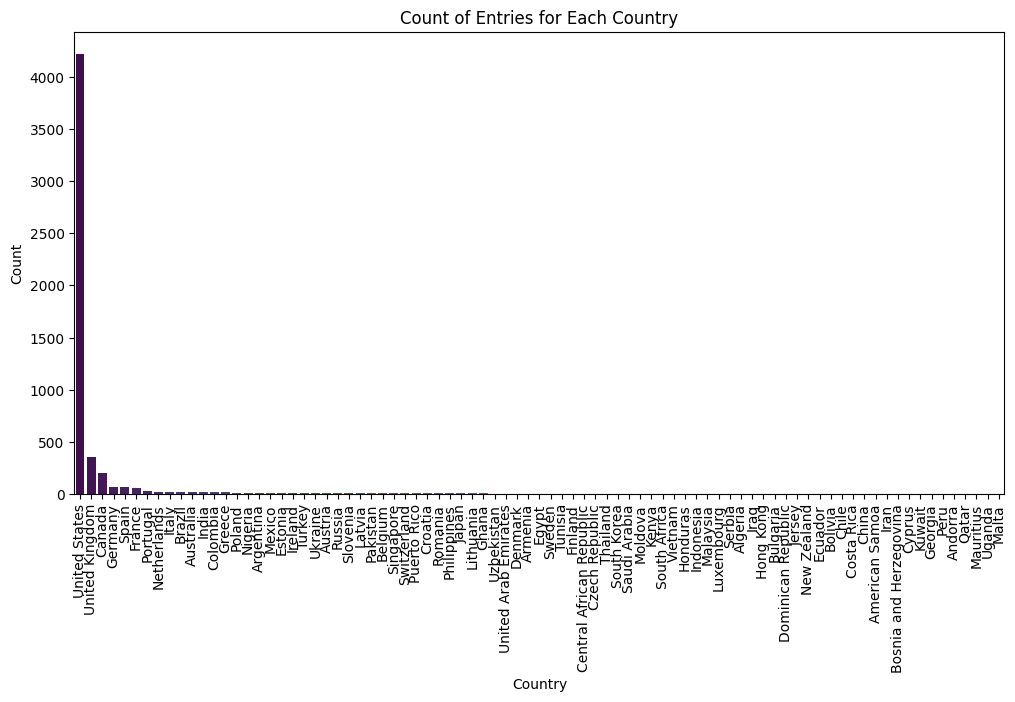

In [159]:
#Our distribution seems very similar to the usd one, so lets see the ratio of all currencies
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with a column 'employee_residence'
# If not, replace it with the actual column name in your DataFrame

# Plot bar plot for count of entries for each country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='employee_residence', order=df['employee_residence'].value_counts().index, palette='viridis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.title('Count of Entries for Each Country')
plt.xlabel('Country')
plt.ylabel('Count')

# Show the plot
plt.show()


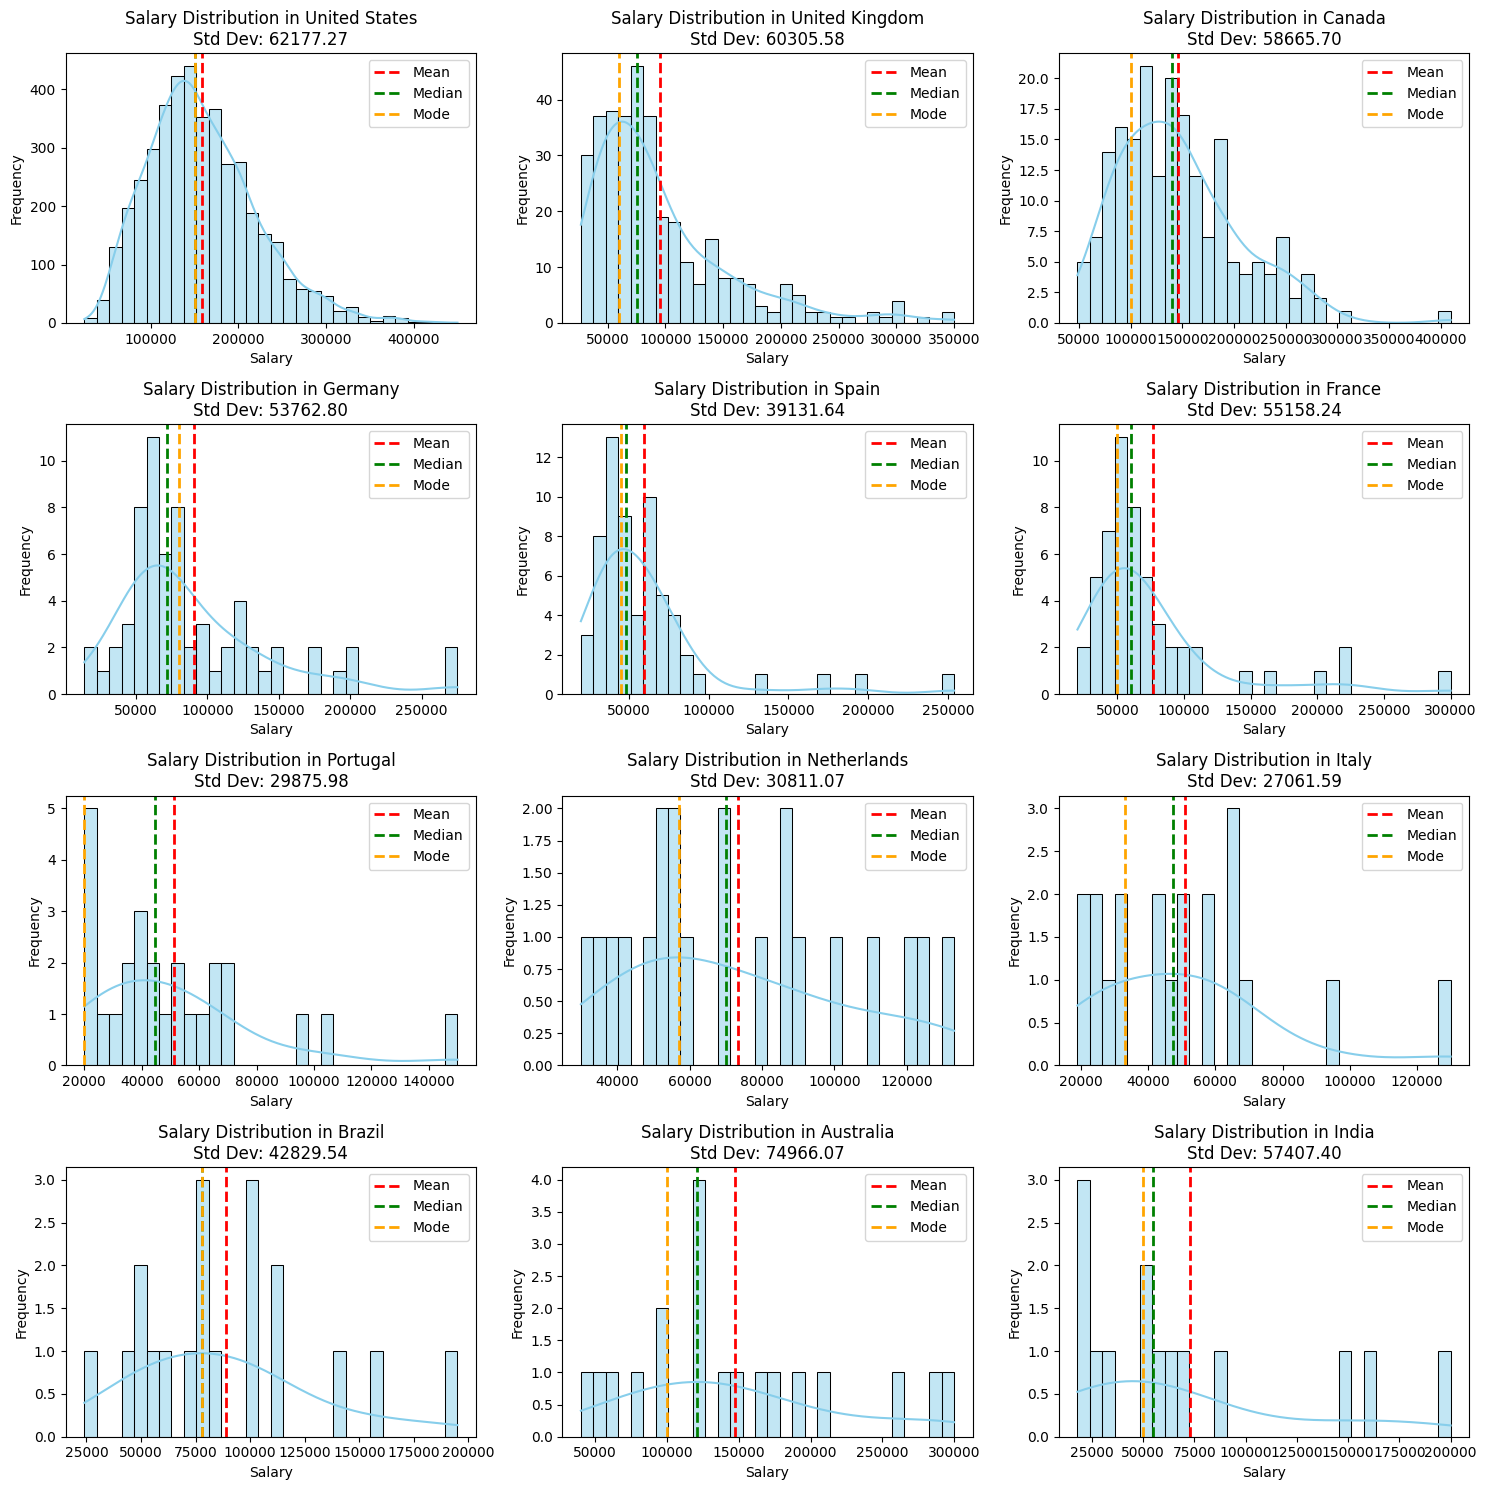

In [160]:
"""
It seems most of the data was from US,
so lets plot for each country seperately the salary distribution
So for simplicity, lets only choose the top 12 countries with most data
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 12 countries based on entry count
top_countries = df['employee_residence'].value_counts().nlargest(12).index

# Create separate plots for each of the top 12 countries with mean, median, mode, and standard deviation
plt.figure(figsize=(15, 15))

for i, country in enumerate(top_countries, 1):
    plt.subplot(4, 3, i)
    country_data = df[df['employee_residence'] == country]['salary']
    sns.histplot(country_data, bins=30, kde=True, color='skyblue')
    plt.axvline(country_data.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(country_data.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(country_data.mode().iloc[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')
    plt.title(f'Salary Distribution in {country}\nStd Dev: {country_data.std():.2f}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



In [161]:
"""
Seeing the first 3 graphs,
(others hav very few data to be significant)

we see even though the sd of US, UK and Canada are around 60,
there is a clear difference in the salary distribution curve, especially the distribution
below the mean
"""

'\nSeeing the first 3 graphs,\n(others hav very few data to be significant)\n\nwe see even though the sd of US, UK and Canada are around 60, \nthere is a clear difference in the salary distribution curve, especially the distribution\nbelow the mean\n'

<ipython-input-162-4e335ff534a2>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



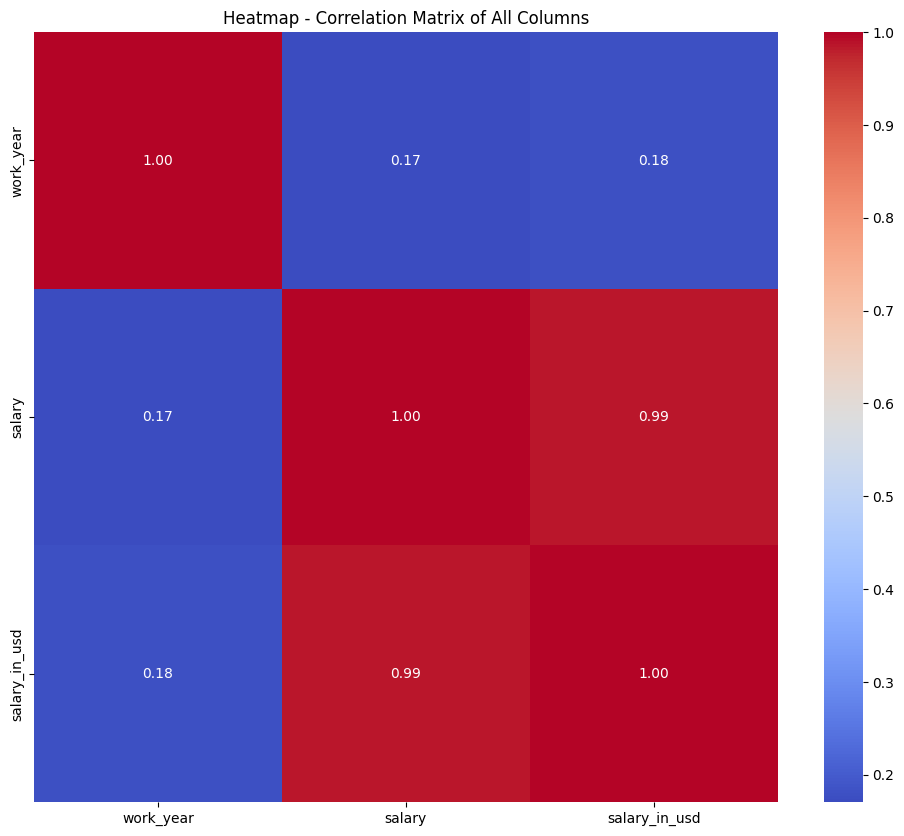

''

In [162]:
#trying heatmaps

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the entire correlation matrix
plt.figure(figsize=(12, 10))
heatmap_data = df.corr()
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Heatmap - Correlation Matrix of All Columns')
plt.show()

"""
): Not significant related data for heatmaps
"""

""


In [163]:
#end of file <>